In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [2]:
dataset=pd.read_csv('datafinal.csv')

In [3]:
dataset['Time']=pd.to_datetime(dataset['Time'])

In [4]:
dataset['Day']=dataset['Time'].dt.day
dataset['Month']=dataset['Time'].dt.month
dataset['Hour']=dataset['Time'].dt.hour
dataset['Minute']=dataset['Time'].dt.minute
dataset=dataset.drop(['Time'],axis=1)

In [5]:
## seperating the dataset of 31st dec,2019 
df=dataset.iloc[:34945,]
df_prediction=dataset.iloc[34945:,]

In [6]:
print(df.shape)

(34945, 12)


In [7]:
print(df_prediction.shape)

(95, 12)


In [8]:
## using the dataset till 30th dec for training and testing
df_train=df.iloc[: int(len(df)*0.9)]
df_test=df.iloc[int(len(df)*0.9):]

In [9]:
print(df_train.shape)
print(df_test.shape)

(31450, 12)
(3495, 12)


In [10]:
x=df_train.drop(['Generation_kW'],axis=1).values
y=df_train['Generation_kW'].values

In [12]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x,y)

RandomForestRegressor()

In [13]:
## using the test set to calculate mae,mse,rmse
pred=df_test.drop(['Generation_kW'],axis=1).values

In [15]:
pred=rfr.predict(pred)

In [16]:
df_test['pred']=pred

<ipython-input-16-24bc7c8dacb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pred']=pred


<AxesSubplot:>

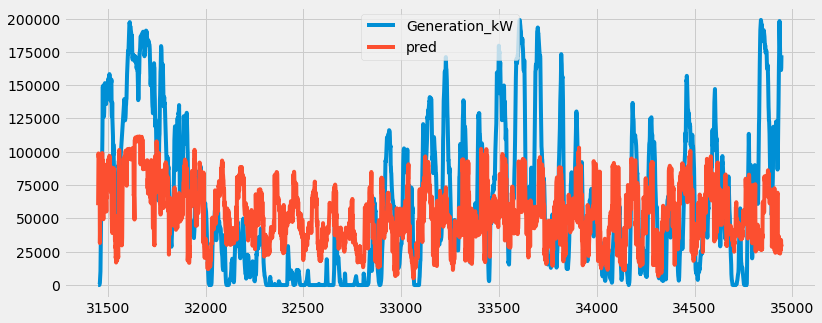

In [17]:
df_test[['Generation_kW','pred']].plot(figsize=(12,5))

In [18]:
from sklearn.metrics import *

In [19]:
print(mean_absolute_error(df_test['Generation_kW'],df_test['pred']))
print(mean_squared_error(df_test['Generation_kW'],df_test['pred']))

39496.29996167172
2412899713.566862


In [20]:
## now predicting the value of 31 st dec and plotting on graph
pred=df_prediction.drop(['Generation_kW'],axis=1).values

In [21]:
pred=rfr.predict(pred)

In [22]:
df_prediction['Predicted value']=pred

<ipython-input-22-c730c7d967d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prediction['Predicted value']=pred


<AxesSubplot:>

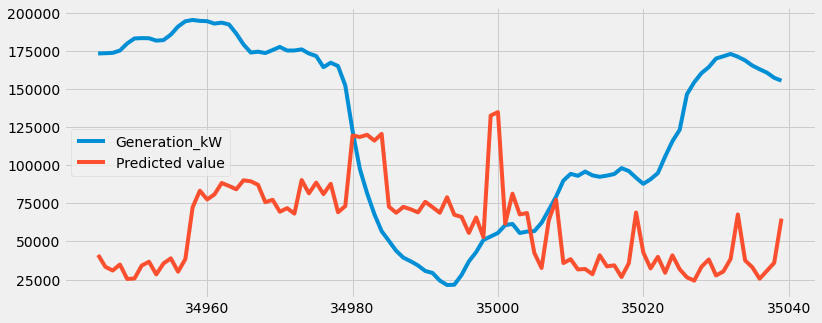

In [23]:
df_prediction[['Generation_kW','Predicted value']].plot(figsize=(12,5))

In [24]:
## mae,mse on 31st dec 

In [25]:
print(mean_absolute_error(df_prediction['Generation_kW'],df_prediction['Predicted value']))
print(mean_squared_error(df_prediction['Generation_kW'],df_prediction['Predicted value']))

81868.57430011535
8777054288.44155


In [26]:
df_prediction

,Generation_kW,FREQ,WP_AVG,TEMP_AVG,WS_AVG_10M,WS_AVG_50M,WS_AVG_80M,WS_AVG_100M,Day,Month,Hour,Minute,Predicted value
34945,173463.80,50.0627,1001.298000,23.488892,3.694000,7.510333,9.517000,10.139333,31,12,0,15,41161.410400
34946,173629.87,50.0243,1001.653667,23.486794,3.328667,7.114667,9.002333,9.962000,31,12,0,30,33348.164000
34947,173842.07,49.9890,1001.493000,23.484695,3.897667,7.990000,9.222000,10.044333,31,12,0,45,30931.287700
34948,175363.40,50.0636,1001.813333,23.482596,3.855667,8.786000,9.760667,10.533000,31,12,1,0,34858.909200
34949,180025.27,49.9835,1001.618000,23.480497,4.285667,9.410667,10.161667,10.975667,31,12,1,15,25391.996300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,165488.13,50.0015,999.200000,23.300000,4.264333,9.217000,10.481667,9.910667,31,12,22,45,33032.006000
35036,163082.27,50.0344,999.164333,23.266667,4.548333,9.294000,10.707000,10.552333,31,12,23,0,25549.828700
35037,160880.20,50.0203,1006.933333,23.600000,4.146000,9.225667,10.584000,10.312667,31,12,23,15,30750.980615
35038,157473.93,50.0402,1006.880000,23.400000,3.547333,9.076667,10.519000,10.234333,31,12,23,30,35967.450200
